### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
data.shape

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [4]:
#Identify features with missing values
data.isna().sum().to_frame().reset_index().rename(columns={0: "numRecsWithMissingValues"}).query('numRecsWithMissingValues>0')

,index,numRecsWithMissingValues
14,car,12576
15,Bar,107
16,CoffeeHouse,217
17,CarryAway,151
18,RestaurantLessThan20,130
19,Restaurant20To50,189


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#Drop 'car' column since it is missing almost all the time.
data2 = data.drop('car', axis=1)

In [6]:
#Replace the missing values for the other columns with 'Missing' since they are very few.
#May decide to impute them later but for now, I will just mark them.
data2 = data2.fillna("Missing")

In [7]:
#Confirm there are no features with missing values in this new dataset
data2.isna().sum().to_frame().reset_index().rename(columns={0: "numRecsWithMissingValues"}).query('numRecsWithMissingValues>0').shape[0]

0

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
print('Percent of observations chose to accept the coupon is %.1f%%' % (data2.query('Y==1').shape[0]/data2.shape[0]*100))

Percent of observations chose to accept the coupon is 56.8%


5. Use a bar plot to visualize the `coupon` column.

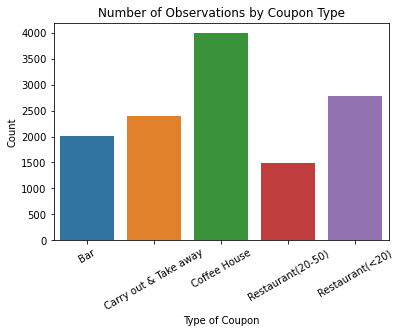

In [9]:
couponFreq = data2['coupon'].value_counts(dropna=False).to_frame().reset_index().sort_values('index')
sns.barplot(data= couponFreq, x='index',y= 'coupon')
plt.title("Number of Observations by Coupon Type")
plt.xticks(rotation = 30)
plt.xlabel("Type of Coupon")
plt.ylabel("Count")
plt.show();

6. Use a histogram to visualize the temperature column.

In [10]:
data2['temperature'].unique()

array([55, 80, 30], dtype=int64)

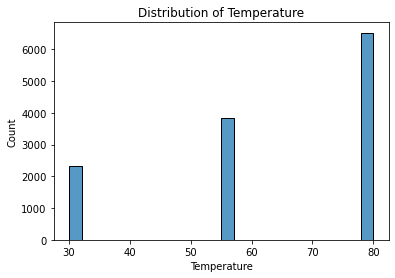

In [11]:
sns.histplot(data2, x= 'temperature')
plt.title("Distribution of Temperature")
plt.ylabel("Count")
plt.xlabel("Temperature")
plt.show();

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
dataBar = data2.query('coupon == "Bar"')
dataBar.shape

(2017, 25)

2. What proportion of bar coupons were accepted?


In [13]:
print('Percent of the bar coupons accepted is %.1f%%' % (dataBar.query('Y==1').shape[0]/dataBar.shape[0]*100))

Percent of the bar coupons accepted is 41.0%


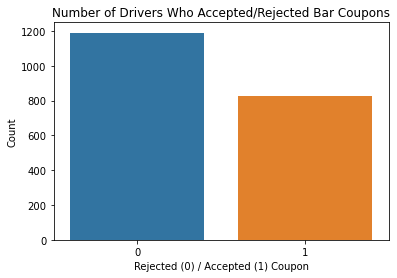

In [14]:
#Created a barchart to show the number of accepted and rejected
couponFreq = dataBar['Y'].value_counts(dropna=False).to_frame().reset_index().sort_values('index')
sns.barplot(data= couponFreq, x='index',y= 'Y')
plt.title("Number of Drivers Who Accepted/Rejected Bar Coupons")
plt.xlabel("Rejected (0) / Accepted (1) Coupon")
plt.ylabel("Count")
plt.show();

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [15]:
#Get unique values for Bar
np.sort(dataBar['Bar'].unique())

array(['1~3', '4~8', 'Missing', 'gt8', 'less1', 'never'], dtype=object)

In [16]:
#Create a list for going to bar 3 or fewer times
barLT3 = ['1~3', 'less1', 'never']

In [17]:
accRate1 = (dataBar.query('Y == "1" and Bar in @barLT3').shape[0]/ \
dataBar.query('Bar in @barLT3').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who went to the bar three times or less in a month %.1f%%' % accRate1)


# Excluded records with Bar == 'Missing' since we don't know how many times they wents to the bar.
accRate2 = (dataBar.query('Y == "1" and Bar not in @barLT3 and Bar != "Missing"').shape[0]/ \
dataBar.query('Bar not in @barLT3 and Bar != "Missing"').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who went to the bar more than three times in a month %.1f%%' % accRate2)

Percent of the bar coupons accepted by the drivers who went to the bar three times or less in a month 37.1%
Percent of the bar coupons accepted by the drivers who went to the bar more than three times in a month 76.9%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
#Get unique values for age
np.sort(dataBar['age'].unique())

array(['21', '26', '31', '36', '41', '46', '50plus', 'below21'],
      dtype=object)

In [19]:
##Create a list for going to bar >= 1 times
barGE1 = ['1~3','4~8','gt8']

#Create two lists for age > 25
ageGE25 = ['26', '31', '36', '41', '46', '50plus']

In [20]:
#Drivers older than 25 and visit the bar more than once a month
accRate3 = (dataBar.query('Y == "1" and age in @ageGE25 and Bar in @barGE1').shape[0])/ \
                    (dataBar.query('age in @ageGE25 and Bar in @barGE1').shape[0])*100
print('Percent of the bar coupons accepted by the drivers older than 25 who go to the bar at least once in a in a month %.1f%%' % accRate3)

#All others. 
# 1. Drivers younger than 25 OR
# 2. Drivers older than 25 and visit the bar at most once a month
# Excluded records with Bar == 'Missing' since we don't know how many times they wents to the bar.
accRate4 = (dataBar.query('Y == "1" and ~(age in @ageGE25 and Bar in @barGE1) and Bar != "Missing"').shape[0])/ \
                    (dataBar.query(' ~(age in @ageGE25 and Bar in @barGE1) and Bar != "Missing"').shape[0])*100
print('Percent of the bar coupons accepted by the drivers younger than 25 or who go to the bar less than once in a in a month %.1f%%' % accRate4)

Percent of the bar coupons accepted by the drivers older than 25 who go to the bar at least once in a in a month 69.5%
Percent of the bar coupons accepted by the drivers younger than 25 or who go to the bar less than once in a in a month 33.4%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [21]:
dataBar['passanger'].unique()
np.sort(dataBar['occupation'].unique())

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

array(['Architecture & Engineering',
       'Arts Design Entertainment Sports & Media',
       'Building & Grounds Cleaning & Maintenance',
       'Business & Financial', 'Community & Social Services',
       'Computer & Mathematical', 'Construction & Extraction',
       'Education&Training&Library', 'Farming Fishing & Forestry',
       'Food Preparation & Serving Related',
       'Healthcare Practitioners & Technical', 'Healthcare Support',
       'Installation Maintenance & Repair', 'Legal',
       'Life Physical Social Science', 'Management',
       'Office & Administrative Support', 'Personal Care & Service',
       'Production Occupations', 'Protective Service', 'Retired',
       'Sales & Related', 'Student', 'Transportation & Material Moving',
       'Unemployed'], dtype=object)

In [22]:
passengerNoKid = ["Friend(s)","Partner"]

In [23]:
accRate5 = (dataBar.query('Y == "1" and Bar in @barGE1 and passanger in @passengerNoKid and occupation != "Farming Fishing & Forestry"').shape[0])/ \
                    (dataBar.query('Bar in @barGE1 and passanger in @passengerNoKid and occupation != "Farming Fishing & Forestry"').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who go to bar more than once and travel with no kids and do not work in Farming, Fishing and Forestry %.1f%%' % accRate5)


accRate6 = (dataBar.query('Y == "1" and ~(Bar in @barGE1 and passanger in @passengerNoKid and occupation != "Farming Fishing & Forestry") and Bar != "Missing"').shape[0])/ \
                    (dataBar.query('~(Bar in @barGE1 and passanger in @passengerNoKid and occupation != "Farming Fishing & Forestry") and Bar != "Missing"').shape[0])*100
print('Percent of the bar coupons accepted by the other drivers %.1f%%' % accRate6)


Percent of the bar coupons accepted by the drivers who go to bar more than once and travel with no kids and do not work in Farming, Fishing and Forestry 71.8%
Percent of the bar coupons accepted by the other drivers 37.7%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [24]:
dataBar['maritalStatus'].unique()
dataBar['RestaurantLessThan20'].unique()
dataBar['income'].unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

array(['4~8', '1~3', 'less1', 'gt8', 'Missing', 'never'], dtype=object)

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [25]:
##Create a list for going to bar >= 1 times
barGE1 = ['1~3','4~8','gt8']

##Create a list for drivers with no kid passengers
passengerNoKid = ["Friend(s)","Partner"]

##Create a list for drivers who are not widowed
maritalStatusNotWidowed= ['Unmarried partner', 'Single', 'Married partner', 'Divorced']

#Create a list for age < 30
ageLT30 = ['21', '26', 'below21']

#Create a list for going to cheap restaurants more than 4 times
cheapRestaurantGE4 = ['4~8','gt8']

#Create a list for income less than 50K
incomeLT50K = ['$37500 - $49999','$12500 - $24999','$25000 - $37499','Less than $12500']

In [26]:
accRate7 = (dataBar.query('Y == "1" and Bar in @barGE1 and passanger in @passengerNoKid and maritalStatus in @maritalStatusNotWidowed').shape[0])/ \
           (dataBar.query('Bar in @barGE1 and passanger in @passengerNoKid and maritalStatus in @maritalStatusNotWidowed').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed  %.1f%%' % accRate7)

accRate8 = (dataBar.query('Y == "1" and Bar in @barGE1 and age in @ageLT30').shape[0])/ \
           (dataBar.query('Bar in @barGE1 and age in @ageLT30').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who go to bars more than once a month and are under the age of 30   %.1f%%' % accRate8)


accRate9 = (dataBar.query('Y == "1" and RestaurantLessThan20 in @cheapRestaurantGE4 and income in @incomeLT50K').shape[0])/ \
           (dataBar.query('RestaurantLessThan20 in @cheapRestaurantGE4 and income in @incomeLT50K').shape[0])*100
print('Percent of the bar coupons accepted by the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K   %.1f%%' % accRate9)

Percent of the bar coupons accepted by the drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed  71.8%
Percent of the bar coupons accepted by the drivers who go to bars more than once a month and are under the age of 30   72.2%
Percent of the bar coupons accepted by the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K   45.3%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### <font color=red> __Insights based on the above stats for "bar" coupons__
    
    
<font color=blue>
   
0. Only 41.0% of the bar coupons were accepted.
1. Older drivers who go to a bar more tend to accept the bar coupons.
2. Younger drivers and drivers who go to a bar less frequently do not tend to accept the bar coupons.
3. Drivers with adult passengers are more likely to accept the the bar coupons.
4. Passengers who are not windowed are more likely to accept the bar coupons.
5. Income is a factor for accepting the bar coupons. Drivers who go to cheap restaurants and earn less do not tend to accept the bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

#### _Let's explore the profile of the drivers who accept Coffee House coupons since majority of the drivers received coffee house coupons_

In [27]:
dataCoffee = data2.query('coupon == "Coffee House"')
dataCoffee.shape

(3996, 25)

1. What proportion of coffee house coupons were accepted?

In [28]:
print('Percent of the coffee house coupons accepted is %.1f%%' % (dataCoffee.query('Y==1').shape[0]/dataCoffee.shape[0]*100))

Percent of the coffee house coupons accepted is 49.9%


2. Compare the acceptance rate between those who travel before noon to those who travel in the afternoon

In [29]:
dataCoffee["time"].unique()

array(['10AM', '2PM', '6PM', '7AM', '10PM'], dtype=object)

In [30]:
morningList = ['10AM','7AM']

In [31]:
acceptRate1 = (dataCoffee.query('Y == "1" and time in @morningList').shape[0])/ \
           (dataCoffee.query('time in @morningList').shape[0])*100
print('Percent of the coffee house coupons accepted by the drivers who travel in the morning  %.1f%%' % acceptRate1)

acceptRate2 = (dataCoffee.query('Y == "1" and ~(time in @morningList)').shape[0])/ \
           (dataCoffee.query('~(time in @morningList)').shape[0])*100
print('Percent of the coffee house coupons accepted by the drivers who travel later in the day  %.1f%%' % acceptRate2)



Percent of the coffee house coupons accepted by the drivers who travel in the morning  54.2%
Percent of the coffee house coupons accepted by the drivers who travel later in the day  46.3%


3. Compare the acceptance rate between single females who travel in the morning and visit coffee house at least four times
with the rest of the population 

In [32]:
dataCoffee['CoffeeHouse'].unique()
dataCoffee['maritalStatus'].unique()
dataCoffee['gender'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', 'Missing'], dtype=object)

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

array(['Female', 'Male'], dtype=object)

In [33]:
#Create a list for travel to coffee house at least four times
coffeeTravelList = ['4~8', 'gt8']

In [34]:
acceptRate3 =  (dataCoffee.query('Y == "1" and (gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @coffeeTravelList) ').shape[0])/ \
           (dataCoffee.query('gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @coffeeTravelList').shape[0])*100
print('Percent of the coffee coupons accepted by single female drivers who travel in the morning  %.1f%%' % acceptRate3)

acceptRate4 = (dataCoffee.query('Y == "1" and ~(gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @coffeeTravelList) and CoffeeHouse !="Missing"').shape[0])/ \
           (dataCoffee.query('~(gender == "Female" and maritalStatus == "Single" and CoffeeHouse in @coffeeTravelList) and CoffeeHouse !="Missing"').shape[0])*100
print('Percent of the coffee house coupons accepted by the rest of the population  %.1f%%' % acceptRate4)


Percent of the coffee coupons accepted by single female drivers who travel in the morning  73.7%
Percent of the coffee house coupons accepted by the rest of the population  49.2%


4. Compare the acceptance rate between highly educated people with income higher than  $50K but go to coffee house at most 3 times but not never

In [35]:
dataCoffee['education'].unique()
dataCoffee['income'].unique()
dataCoffee['CoffeeHouse'].unique()

array(['Some college - no degree', 'Bachelors degree',
       'Associates degree', 'High School Graduate',
       'Graduate degree (Masters or Doctorate)', 'Some High School'],
      dtype=object)

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

array(['never', 'less1', '4~8', '1~3', 'gt8', 'Missing'], dtype=object)

In [36]:
#Create a list for highly educated people
educatedList = ['Bachelors degree','Associates degree','Graduate degree (Masters or Doctorate)']

#Create a list for income higher than $50K
incomeList = ['$62500 - $74999','$75000 - $87499', '$50000 - $62499','$100000 or More', '$87500 - $99999']

#Create a list for coffee house travel at most 3 times
coffeeTravelList = ['less1', '1~3']

In [37]:
acceptRate5 =  (dataCoffee.query('Y == "1" and (education in @educatedList and income in @incomeList and CoffeeHouse in @coffeeTravelList) ').shape[0])/ \
           (dataCoffee.query('education in @educatedList and income in @incomeList and CoffeeHouse in @coffeeTravelList').shape[0])*100
print('Percent of the coffee coupons accepted by highly educated, high income drivers who go to coffee house at most three times but not never  %.1f%%' % acceptRate5)

acceptRate6 = (dataCoffee.query('Y == "1" and ~(education in @educatedList and income in @incomeList and CoffeeHouse in @coffeeTravelList)  and CoffeeHouse !="Missing"').shape[0])/ \
           (dataCoffee.query('~(education in @educatedList and income in @incomeList and CoffeeHouse in @coffeeTravelList) and CoffeeHouse !="Missing"').shape[0])*100
print('Percent of the coffee house coupons accepted by the rest of the population  %.1f%%' % acceptRate6)

Percent of the coffee coupons accepted by highly educated, high income drivers who go to coffee house at most three times but not never  49.8%
Percent of the coffee house coupons accepted by the rest of the population  50.0%


6. Compare the acceptance rates between those drivers who:

- go to coffee house more than once a month, do not travel alone, and were not widowed *OR*
- go to coffee house more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [38]:
dataCoffee['CoffeeHouse'].unique()
dataCoffee['passanger'].unique()
dataCoffee['maritalStatus'].unique()
dataCoffee['age'].unique()
dataCoffee['income'].unique()
dataCoffee['RestaurantLessThan20'].unique()

array(['never', 'less1', '4~8', '1~3', 'gt8', 'Missing'], dtype=object)

array(['Friend(s)', 'Kid(s)', 'Alone', 'Partner'], dtype=object)

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

array(['4~8', '1~3', 'less1', 'gt8', 'Missing', 'never'], dtype=object)

In [39]:
#Create a list for going to coffee house more than one a month
coffeeTravelList = ['4~8', '1~3', 'gt8']

#Create a list for under the age of 30
ageList = ['21', '26','below21']

#Create a list of cheap restaurants
cheapRestaurantList = ['4~8','gt8']

#Create a list for income less than $50K
incomeList = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']

In [40]:
accRate7 = (dataCoffee.query('Y == "1" and CoffeeHouse in @coffeeTravelList and passanger != "Alone" and maritalStatus != "Widowed"').shape[0])/ \
           (dataCoffee.query('CoffeeHouse in @coffeeTravelList and passanger != "Alone" and maritalStatus != "Widowed"').shape[0])*100
print('Percent of the coffee house coupons accepted by the drivers who go to coffee houses more than once a month, travelled alone, and were not widowed  %.1f%%' % accRate7)


accRate8 = (dataCoffee.query('Y == "1" and CoffeeHouse in @coffeeTravelList  and age in @ageLT30').shape[0])/ \
           (dataCoffee.query('CoffeeHouse in @coffeeTravelList  and age in @ageLT30').shape[0])*100
print('Percent of the coffee house coupons accepted by the drivers who go to coffee houses more than once a month and are under the age of 30   %.1f%%' % accRate8)


accRate9 = (dataCoffee.query('Y == "1" and RestaurantLessThan20 in @cheapRestaurantList and income in @incomeList').shape[0])/ \
           (dataCoffee.query('RestaurantLessThan20 in @cheapRestaurantList and income in @incomeList').shape[0])*100
print('Percent of the coffee house coupons accepted by the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K   %.1f%%' % accRate9)

Percent of the coffee house coupons accepted by the drivers who go to coffee houses more than once a month, travelled alone, and were not widowed  75.2%
Percent of the coffee house coupons accepted by the drivers who go to coffee houses more than once a month and are under the age of 30   68.9%
Percent of the coffee house coupons accepted by the drivers who go to cheap restaurants more than 4 times a month and income is less than 50K   54.3%


### <font color=red> __Insights based on the above stats for "coffee house" coupons__


    
<font color=blue>

0. Half of the coffee house coupons were accepted.
1. Drivers who travel in the morning are more likely to accept coffee coupons.
2. Single female drivers travelling in the morning tend to accept the coffee coupons compared to the rest of the population.
3. Highly educated people with high income who are not very frquent coffee house travelers are not any more likely to accept the coupon than the rest of the population.
4. Three quarters of the driver who go to a coffee house at least once a month, travelling with someone and not widowed accept the coffee house coupons.
5. Drivers younger than 30 who go to a coffee house at least once a month are likely to accept the coffee house coupons.
6. More than half of the drivers with less income and visit cheap restaurants accept the coffee house coupons.